# CPSC 122 Git Commit Statistics
Tony Nguyen

CPSC 222 01

11/22/2022

I attempted the bonus question

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### Description
S1 and S2 are the total number of Git commits each student made on their programming assignments (PA3-PA9) in CPSC 122-01 and CPSC 122-02 in Spring 2020

S1 group is the control group, while S2 is the experiment group. Commit is summed per students to ensure independency. The S2 students used a fully automated gamification software tool we designed that encouraged them to complete assignments early

In [28]:
s1 = [4, 44, 21, 45, 3, 43, 19, 36, 68, 63, 24, 39, 42, 45, 25, 20, 24, 31, 2, 25, 30, 31, 24, 16, 44]
s2 = [10, 22, 40, 58, 49, 64, 26, 57, 139, 49, 41, 66, 12, 40, 20, 67, 106, 4, 46, 4, 34, 12, 48, 11, 62]
s2_series = pd.Series(s2)

### Mid value
$$ \frac {min + max}{2}$$
* The middle point of S2, calculates by taking the minimum value, add up with the maximum value, and divide by 2. The mid value of S2 is 71.5

In [29]:
s2_mid_val = (s2_series.min() + s2_series.max()) / 2
print("Mid value of S2 is", s2_mid_val)

Mid value of S2 is 71.5


### Mean
$$ \overline {x} = \frac {\sum {x}}{n}$$
* The average value of S2, calculates by taking the sum of all values and dividing by the number of sample. The mean of S2 is 43.48
* $\overline {x}$ = Sample mean
* $n$: Number of sample

In [30]:
sum = 0
for item in range(len(s2_series)):
    sum += s2_series[item]
s2_mean = sum / len(s2_series)
print("Mean of S2 is", s2_mean)

Mean of S2 is 43.48


### Median
$$\begin{cases}
    (\frac{n + 1}{2})^\text{th} \text{term}, & \text{if n is odd} \\ 
    \frac{(\frac{n}{2})^\text{th} \text{term} + (\frac{n}{2} + 1)^\text{th} \text{term}}{2}, & \text{if n is even}
\end{cases}
\\
\text{}\\
$$
* $n = \text{number of values in data set}$
* The length of S2 in this case is an odd number. So, to find the median of S2, we use the upper case, which is to find the 13th term of S2. The median of S2 is 41

Latex case definition source [here](https://kogler.wordpress.com/2008/03/21/latex-multiline-equations-systems-and-matrices/)

In [45]:
sorted_series = s2_series.sort_values(ignore_index=True)
n = len(sorted_series)

if n % 2 != 0:
    s2_median = sorted_series[((n + 1) / 2) - 1]
else:
    s2_median = (sorted_series[(n / 2) - 1] + sorted_series[((n / 2) + 1) - 1]) / 2
print("Median of S2 is", s2_median)

Median of S2 is 41


### Mode
* Mode is the value that appears most in the dataset. The mode of S2 are 4, 12, 40, and 49

In [44]:
s2_mode = s2_series.mode()
print("Mode of S2 is/are:")
s2_mode

Mode of S2 is/are:


0     4
1    12
2    40
3    49
dtype: int64

### Range
$$max - min$$
* The range is the difference between the maximum value and the minimum value. The range of S2 is 135


In [33]:
s2_range = s2_series.max() - s2_series.min()
print("Range of S2 is", s2_range)

Range of S2 is 135


### Quartiles
* Quartiles are three data points that divide the dataset into four quarters.
* For S2, the first quartile, or Q1, represents the first 25% of the value, meaning there is 25% of value less than this point. Q1 of S2 is 20. 
* The second quartile, or Q2, happens to be the same as the median of the dataset, which is 41. At this point 41, there is 50% of value less than 41, and 50% of value greater than 41.
* The third quartile, or Q3, is at 58. At this point, there is 25% of value greater than 58

In [46]:
n = len(sorted_series)
q1, q2, q3 = np.percentile(sorted_series, [25, 50, 75])
print("The first quartile is", q1)
print("The second quartile is", q2)
print("The third quartile is", q3)

The first quartile is 20.0
The second quartile is 41.0
The third quartile is 58.0


### Variance (sample)
$$s^2 = \frac{\sum (x - \overline{x})^2}{n - 1}\\$$

* $s^2 = \text {Sample variance}$
* $x = \text {Value of one observation}$
* $\overline{x} = \text {Mean value of all observation}$
* $n = \text {Number of observations}$
* Variance is the degree of spread in a data set about the mean value of that data. The larger the variance is, the more spread the data point is. The variance of S2 is 1002.177

In [35]:
num_total = 0.0
variance = 0.0
for i in range(len(sorted_series)):
    num_total += pow((sorted_series[i] - s2_mean), 2)
s2_variance = num_total / (n - 1)

print("Variance of S2 is", s2_variance)

Variance of S2 is 1002.1766666666667


### Standard Deviation (sample)
$$s = \sqrt { \frac{\sum (x - \overline{x})^2}{n - 1}}\\$$

* $s = \text {Standard deviation}$
* $x = \text {Value of one observation}$
* $\overline{x} = \text {Mean value of all observation}$
* $n = \text {Number of observations}$
* A standard deviation is a measure of how dispersed the data is in relation to the mean. Standard deviation is also the square root variance. The standard deviation of S2 is 31.657

In [36]:
s2_std = np.sqrt(s2_variance)
print("Standard Deviation of S2 is", s2_std)

Standard Deviation of S2 is 31.65717401580038


### Calculate 95% Confidence Interval for the Population Mean
$$ME = t \frac {s}{\sqrt{n}} $$

$$CI = \overline{X} \pm ME$$

* $ME = \text {Margin of error}$
* $CI = \text {Confidence interval}$
* $\overline{X} = \text {Sample mean}$
* $t = \text {t-score, from the t-distribition table}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

##### S1 Calculation

$df = n - 1 = 25 - 1 = 24 \text { (Degree of freedom)}$

In [37]:
t = 2.064
s1_mean = np.mean(s1)
s1_std = np.std(s1, ddof=1)

print("S1 t-score is", t)
print("S1 sample mean is", s1_mean)
print("S1 standard deviation is", s1_std)
print("S1 number of sample is", n)

s1_me = t * (s1_std / np.sqrt(n))
print("S1 margin of error is", s1_me)

s1_CI = (s1_mean - s1_me, s1_mean + s1_me)
print("We are 95% confident that the population mean for total number of Git commits each student made of their programming assignment is within", s1_CI)

S1 t-score is 2.064
S1 sample mean is 30.72
S1 standard deviation is 16.63209748247847
S1 number of sample is 25
S1 margin of error is 6.865729840767114
We are 95% confident that the population mean for total number of Git commits each student made of their programming assignment is within (23.854270159232886, 37.585729840767115)


##### S2 Calculation

$df = n - 1 = 25 - 1 = 24 \text { (Degree of freedom)}$

In [38]:
t = 2.064
print("S2 t-score is", t)
print("S2 sample mean is", s2_mean)
print("S2 standard deviation is", s2_std)
print("S2 number of sample is", n)

s2_me = t * (s2_std / np.sqrt(n))
print("S2 margin of error is", s2_me)

s2_CI = (s2_mean - s2_me, s2_mean + s2_me)
print("We are 95% confident that the population mean for total number of Git commits each student made of their programming assignment is within", s2_CI)

S2 t-score is 2.064
S2 sample mean is 43.48
S2 standard deviation is 31.65717401580038
S2 number of sample is 25
S2 margin of error is 13.068081433722398
We are 95% confident that the population mean for total number of Git commits each student made of their programming assignment is within (30.4119185662776, 56.548081433722395)


##### Confidence Intervals Plot Visualization

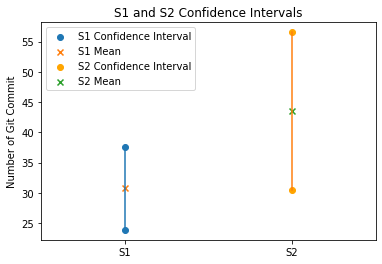

In [39]:
plt.figure()
plt.xlim([0, 2])

plt.scatter([0.5, 0.5], [s1_CI[0], s1_CI[1]], label="S1 Confidence Interval")
plt.scatter(0.5, s1_mean, marker="x", label="S1 Mean")
plt.plot([0.5, 0.5], s1_CI)

plt.scatter([1.5, 1.5], [s2_CI[0], s2_CI[1]], color="orange", label="S2 Confidence Interval")
plt.scatter(1.5, s2_mean, marker="x", label="S2 Mean")
plt.plot([1.5, 1.5], s2_CI)

plt.xticks([0.5, 1.5], ["S1", "S2"])
plt.ylabel("Number of Git Commit")
plt.title("S1 and S2 Confidence Intervals")
plt.legend()

plt.show()

### S2 One-sample, One-tailed t-test of the Population Mean

##### Step 1: State the null and alternative hypothesis
* $H_0$: $\mu \leq 28$
* $H_1$: $\mu > 28$

##### Step 2: Select the significance level
* $\alpha$ = 0.025

##### Step 3: Select the appropriate test statistic
$$t = \frac {\overline {x} - \mu}{s / \sqrt{n}}$$
* $t = \text {t-score}$
* $\overline{x} = \text {Sample mean}$
* $\mu = \text {Population mean}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

##### Step 4: Formulate decision rule
* df = n - 1 = 25 - 1 = 24$
* Critical value: $t_{critical} = 2.064$
* Since $H_1$: $\mu > 28$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 2.064$, then *Reject $H_0$*
    * If $t_{computed} \leq 2.064$, then *Do no reject $H_0$*

##### Step 5: Make the decision
1. Compute $t_{computed}$
* $t_{computed} = \frac {\overline {x} - \mu}{s / \sqrt{n}} = \frac {43.48 - 28}{31.66 / \sqrt {25}} = 2.445$

2. Apply the decision rule
* Since $t_{computed}$ is 2.445, which is greater than $t_{critical}$ at 2.064, we reject $H_0$, fail to reject $H_1$, and $\mu > 28$

3. Compute $p_{value}$
* $t_{computed} = 2.445$
* $df = 24$
* From the t-distribution table, our $p_{value}$ is within $0.010 < p_{value} < 0.025$, which is less than $\alpha = 0.025$
* Reject $H_0$, fail to reject $H_1$, and $\mu > 28$

4. Write a conclusion
* At the 0.025 significance, we can conclude that the S2 students committed more than 28 times on average

##### Checking with SciPy

In [40]:
t_computed, pval = stats.ttest_1samp(s2, 28)
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.025
t_critical = 2.064
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: 2.444943441931012
p_value is: 0.011102335949256276
Reject H0


##### SciPy and manual calculation comparison
* The results of SciPy calculation and manual calculation yield the same result
* We reject $H_0$, fail to reject $H_1$, and $\mu > 28$

### S1 and S2 Two-sample, One-tailed Independent t-test of the Population Mean

* Recall that S1 is the control group and S2 is the experiment group
* $\mu_1$ is the mean population of S1, and $\mu_2$ is the mean population of S2

##### Step 1: State the null and alternative hypothesis
* $H_0$: $\mu_2 \leq \mu_1$
* $H_1$: $\mu_2 > \mu_1$

##### Step 2: Select the significance level
* $\alpha$ = 0.05

##### Step 3: Select the appropriate test statistic
$$t = \frac {\overline {X_2} - \overline {X_1}}{\sqrt {s_p^2 (\frac {1}{n_1} + \frac {1}{n_2})}}$$

$$\text {where } s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s_1, s_2 = \text {Standard deviation of S1 and S2}$
* $n_1, n_2 = \text {Number of sample of S1 and S2}$

##### Step 4: Formulate decision rule
* $df = n_1 + n_2 - 2 = 25 + 25 - 2 = 48$
* Critical value: $t_{critical} = 1.677$
* Since $H_1$: $\mu_2 > \mu_1$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 1.677$, then *Reject $H_0$*
    * If $t_{computed} \leq 1.677$, then *Do no reject $H_0$*

##### Step 5: Make the decision
1. Compute $t_{computed}$
* $s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2} = \frac {(25 - 1) \times 16.63^2 + (25 - 1) \times 31.66^2}{25 + 25 - 2} = 639.456$
* $t_{computed} = \frac {\overline {X_2} - \overline {X_1}}{\sqrt {s_p^2 (\frac {1}{n_1} + \frac {1}{n_2})}} = \frac {43.48 - 30.72}{\sqrt {639.456 \times (\frac {1}{25} + \frac{1}{25})}} = 1.784$

2. Apply the decision rule
* Since $t_{computed}$ is 1.784, which is greater than $t_{critical}$ at 1.677, we reject $H_0$, fail to reject $H_1$, and $\mu_2 > \mu_1$

3. Compute $p_{value}$
* $t_{computed} = 1.784$
* $df = 48$
* From the t-distribution table, our $p_{value}$ is within $0.025 < p_{value} < 0.05$, which is less than $\alpha = 0.05$
* Reject $H_0$, fail to reject $H_1$, and $\mu_2 > \mu_1$

4. Write a conclusion
* At the 0.05 significance, we can conclude that the S2 students committed more than average the S1 students

##### Checking with SciPy

In [41]:
t_computed, pval = stats.ttest_ind(s2, s1, equal_var=False)
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.05
t_critical = 1.677
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: 1.784098380137661
p_value is: 0.041383224909752096
Reject H0


##### SciPy and manual calculation comparison
* The results of SciPy calculation and manual calculation yield the same result
* We reject $H_0$, fail to reject $H_1$, and $\mu_2 > \mu_1$